In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import matplotlib.pyplot as plt
#%matplotlib plt.rcParams['figure.figsize'] = (12.0, 6.0)
#%matplotlib plt.rc('figure', figsize=(20.0, 10.0))

import os, sys

DATAPATH = '/content/drive/My Drive/Coursera/EDHEC/investment-portfolio/data'
print(f"DATAPATH:{DATAPATH} contents:{os.listdir(DATAPATH)}")

MODULEPATH = '/content/drive/My Drive/Coursera/EDHEC/investment-portfolio/nb'
print(f"MODULEPATH:{MODULEPATH} contents:{os.listdir(MODULEPATH)}")

sys.path.append(MODULEPATH)
print(f"sys.path:{sys.path}")

import numpy as np
import pandas as pd

import edhec_risk_kit_110_BBI as erk

DATAPATH:/content/drive/My Drive/Coursera/EDHEC/investment-portfolio/data contents:['sample_prices.csv', 'edhec-hedgefundindices.csv', 'ind30_m_vw_rets.csv', 'Portfolios_Formed_on_ME_monthly_EW.csv', 'ind30_m_ew_rets.csv']
MODULEPATH:/content/drive/My Drive/Coursera/EDHEC/investment-portfolio/nb contents:['lab_110.ipynb', 'edhec_risk_kit_110_BBI.py', 'lab_101.ipynb', 'lab_102.ipynb', 'lab_103.ipynb', 'hello.py', '__pycache__', 'edhec_risk_kit_104_BBI.py', 'lab_104.ipynb', 'edhec_risk_kit_105_BBI.py', 'lab_105.ipynb', 'edhec_risk_kit_106_BBI.py', 'lab_106.ipynb', 'module_1_quiz.ipynb', 'edhec_risk_kit_107_BBI.py', 'lab_107.ipynb', 'edhec_risk_kit_108_BBI.py', 'lab_108.ipynb', 'edhec_risk_kit_109_BBI.py', 'lab_109.ipynb']
sys.path:['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/con

# Finding the Max Sharpe Ratio Portfolio

We've already seen that given a set of expected returns and a covariance matrix, we can plot the efficient frontier. In this section, we'll extend the code to locate the point on the efficient frontier that we are most interested in, which is the tangency portfolio or the Max Sharpe Ratio portfolio.

Let's start by the usual imports, and load in the data.

In [0]:
#%load_ext autoreload
#%autoreload 2
#%matplotlib inline
#import edhec_risk_kit_110 as erk

ind = erk.get_ind_returns(DATAPATH)
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [7]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,Cnstr,Steel,FabPr,ElcEq,Autos,Carry,Mines,Coal,Oil,Util,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002609,0.002379,0.002061,0.000846,0.001035,0.001374,0.001733,0.001230,0.001414,0.001216,0.001487,0.000070,0.000742,0.001313,0.000618,0.001583,0.000909,0.000027,0.001079,0.000943,0.000667,0.000237,-0.000315,0.001429,0.001534,0.000740,0.001363,0.001230,0.002132,0.001057
Beer,0.002379,0.005264,0.001359,0.001348,0.000865,0.002804,0.001704,0.001955,0.001460,0.002005,0.002268,0.000213,0.000769,0.001236,0.001520,0.002015,0.000278,0.001728,0.000733,0.000643,0.001146,0.000438,0.000007,0.001710,0.002284,0.000697,0.001690,0.001822,0.002571,0.001383
Smoke,0.002061,0.001359,0.008349,0.000379,-0.000128,0.001167,0.000950,0.001038,0.000853,0.000779,0.001446,0.000322,0.000912,0.000006,0.000314,0.001812,0.001588,-0.000733,0.000984,0.001274,0.000062,-0.000218,-0.000120,0.001327,0.000396,0.001707,0.000105,0.000703,0.001312,0.001741
Games,0.000846,0.001348,0.000379,0.003773,0.001726,0.001206,0.002189,0.001433,0.001775,0.001422,0.002013,0.003132,0.002848,0.002386,0.002371,0.001874,0.001777,0.001888,0.001119,0.000036,0.001922,0.002848,0.003434,0.001852,0.001578,0.001966,0.001872,0.001561,0.002416,0.002382
Books,0.001035,0.000865,-0.000128,0.001726,0.002612,0.001025,0.002361,0.000758,0.001731,0.001459,0.001753,0.001992,0.001947,0.002426,0.001723,0.001422,0.001304,0.002426,0.000988,0.000550,0.001918,0.002367,0.001944,0.001638,0.001776,0.001392,0.002223,0.001189,0.002261,0.001442
Hshld,0.001374,0.002804,0.001167,0.001206,0.001025,0.003300,0.001320,0.001473,0.001413,0.001364,0.002080,0.001296,0.001343,0.001675,0.001760,0.001975,0.000687,0.002300,0.000620,0.000373,0.001060,0.001310,0.001102,0.001873,0.001582,0.000683,0.001378,0.001202,0.001912,0.001580
Clths,0.001733,0.001704,0.000950,0.002189,0.002361,0.001320,0.005655,0.000834,0.002932,0.002472,0.002937,0.001895,0.002834,0.002593,0.002887,0.003301,0.002685,0.002792,0.001924,0.000800,0.001436,0.001625,0.000834,0.003165,0.002862,0.001934,0.003013,0.002721,0.003210,0.002299
Hlth,0.001230,0.001955,0.001038,0.001433,0.000758,0.001473,0.000834,0.002565,0.000474,0.000608,0.001399,0.001019,0.000896,0.001260,0.001019,0.000784,0.001223,0.001902,0.000597,0.000572,0.001204,0.001651,0.001535,0.000650,0.000944,0.001056,0.000869,0.000986,0.001617,0.001258
Chems,0.001414,0.001460,0.000853,0.001775,0.001731,0.001413,0.002932,0.000474,0.003276,0.001868,0.002088,0.002588,0.002536,0.001755,0.002034,0.002592,0.002425,0.002213,0.002077,0.000673,0.001004,0.001203,0.001031,0.002920,0.002196,0.001404,0.001808,0.001646,0.002469,0.002059
Txtls,0.001216,0.002005,0.000779,0.001422,0.001459,0.001364,0.002472,0.000608,0.001868,0.003117,0.001860,0.001322,0.001691,0.001222,0.001982,0.002035,0.001291,0.000732,0.001274,0.000926,0.000907,0.000666,0.000702,0.002058,0.001929,0.001610,0.001805,0.001250,0.001986,0.001811


We already know how to identify points on the curve if we are given a target rate of return. Instead of minimizing the vol based on a target return, we want to find that one point on the curve that maximizes the Sharpe Ratio, given the risk free rate.

```python
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x
```

Let's guess where the point might be:

(0.0, 0.14178366279800372)

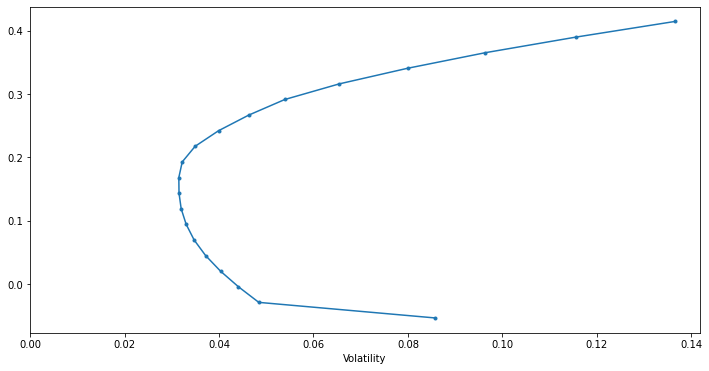

In [9]:
import edhec_risk_kit_110_BBI as erk
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)

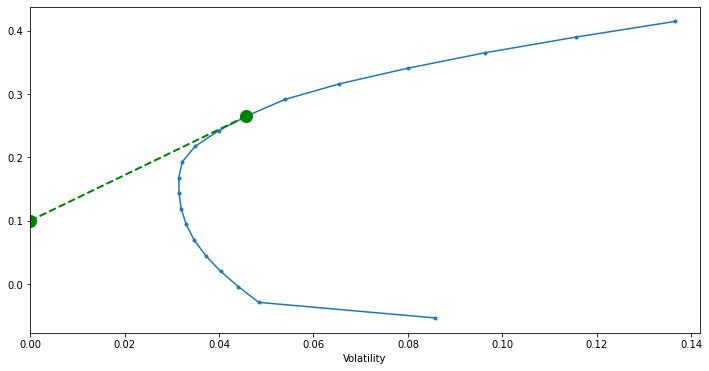

In [10]:
# plot EF
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left = 0)
# get MSR
rf = 0.1
w_msr = erk.msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add CML
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

In [11]:
r_msr, vol_msr

(0.26473948059155666, 0.04571973167587011)

Let's put it all together by adding the CML to the `plot_ef` code.

Add the following code:

```python
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
```


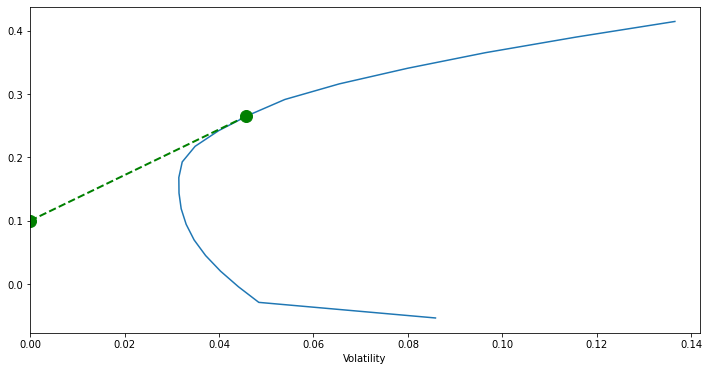

In [12]:
erk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)